In [ ]:
import os

mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-5.3.0-posix-seh-rt_v4-rev0\\mingw64\\bin'

os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.decomposition import NMF
from  xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor


from subprocess import check_output

In [3]:
from subprocess import check_output
print(check_output(["ls", "../data"]).decode("utf8"))


prop_16=pd.read_csv('../data/properties_2016.csv')
train_16=pd.read_csv('../data/train_2016_v2.csv')
submission=pd.read_csv('../data/sample_submission.csv')
submission=submission.rename(columns={'ParcelId': 'parcelid'}) 

properties_2016.csv
properties_2017.csv
sample_submission.csv
train_2016_v2.csv
train_2017.csv
train_merged_2016.csv
train_merged_2016old.csv
train_merged_class_2016.csv
train_merged_plotclass_2016.csv
zillow_data_dictionary.xlsx
Zip_MedianValuePerSqft_AllHomes.csv
Zip_Zhvi_SingleFamilyResidence.csv



C:\Users\e025515\AppData\Local\Continuum\anaconda3new\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
print(prop_16.columns.values)
#print(prop_16.dtypes)
print('=======================')
print(train_16.columns.values)
print('=======================')
print(prop_16.head(10))
#print(prop_16.dtypes)
print('=======================')
print(train_16.head(10))

['parcelid' 'airconditioningtypeid' 'architecturalstyletypeid'
 'basementsqft' 'bathroomcnt' 'bedroomcnt' 'buildingclasstypeid'
 'buildingqualitytypeid' 'calculatedbathnbr' 'decktypeid'
 'finishedfloor1squarefeet' 'calculatedfinishedsquarefeet'
 'finishedsquarefeet12' 'finishedsquarefeet13' 'finishedsquarefeet15'
 'finishedsquarefeet50' 'finishedsquarefeet6' 'fips' 'fireplacecnt'
 'fullbathcnt' 'garagecarcnt' 'garagetotalsqft' 'hashottuborspa'
 'heatingorsystemtypeid' 'latitude' 'longitude' 'lotsizesquarefeet'
 'poolcnt' 'poolsizesum' 'pooltypeid10' 'pooltypeid2' 'pooltypeid7'
 'propertycountylandusecode' 'propertylandusetypeid' 'propertyzoningdesc'
 'rawcensustractandblock' 'regionidcity' 'regionidcounty'
 'regionidneighborhood' 'regionidzip' 'roomcnt' 'storytypeid'
 'threequarterbathnbr' 'typeconstructiontypeid' 'unitcnt'
 'yardbuildingsqft17' 'yardbuildingsqft26' 'yearbuilt' 'numberofstories'
 'fireplaceflag' 'structuretaxvaluedollarcnt' 'taxvaluedollarcnt'
 'assessmentyear' 'landta

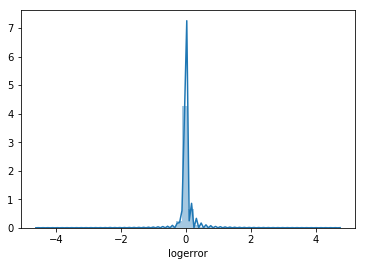

In [5]:
sns.distplot(train_16['logerror'])
plt.show()

In [ ]:
sns.regplot('parcelid','logerror',data=train_16)
plt.show()

In [ ]:
sns.stripplot(x='transactiondate',y='logerror',data=train_16)
plt.show()

In [ ]:
plt.figure(figsize=(10,40))
sns.violinplot(y='transactiondate',x='logerror',data=train_16)
plt.show()

In [ ]:
print(prop_16.shape)
prop_null=prop_16.isnull().sum()

prop_null.plot(kind='bar',figsize=(20,10),color='green')
plt.xticks(fontsize=20)
plt.xlabel('Feature Name')
plt.yticks(fontsize=20)
plt.ylabel('Null Value Count')
plt.show()

In [6]:
print(prop_16.shape)
prop_null=prop_16.isnull().sum()/prop_16.shape[0]*100

prop_null.plot(kind='bar',figsize=(20,10),color='grey')
plt.xticks(fontsize=20)
plt.xlabel('Feature Name')
plt.yticks(fontsize=20)
plt.ylabel('Null Value Count')


(2985217, 58)


Text(0,0.5,'Null Value Count')

In [7]:
imp_feature=prop_16.loc[:,prop_null<80]
imp_feature.fillna(imp_feature.median(),inplace=True)

C:\Users\e025515\AppData\Local\Continuum\anaconda3new\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,parcelid,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,...,roomcnt,unitcnt,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock
0,10754147,1.0,0.0,0.0,7.0,2.0,1572.0,1539.0,6037.0,2.0,...,0.0,1.0,1963.0,1.0,122590.0,9.0,2015.0,9.0,3991.78,6.037572e+13
1,10759547,1.0,0.0,0.0,7.0,2.0,1572.0,1539.0,6037.0,2.0,...,0.0,1.0,1963.0,1.0,122590.0,27516.0,2015.0,27516.0,3991.78,6.037572e+13
2,10843547,1.0,0.0,0.0,7.0,2.0,73026.0,1539.0,6037.0,2.0,...,0.0,2.0,1963.0,1.0,650756.0,1413387.0,2015.0,762631.0,20800.37,6.037572e+13
3,10859147,1.0,0.0,0.0,7.0,2.0,5068.0,1539.0,6037.0,2.0,...,0.0,1.0,1948.0,1.0,571346.0,1156834.0,2015.0,585488.0,14557.57,6.037572e+13
4,10879947,1.0,0.0,0.0,7.0,2.0,1776.0,1539.0,6037.0,2.0,...,0.0,1.0,1947.0,1.0,193796.0,433491.0,2015.0,239695.0,5725.17,6.037572e+13
5,10898347,1.0,0.0,0.0,7.0,2.0,2400.0,1539.0,6037.0,2.0,...,0.0,1.0,1943.0,1.0,176383.0,283315.0,2015.0,106932.0,3661.28,6.037572e+13
6,10933547,1.0,0.0,0.0,7.0,2.0,1572.0,1539.0,6037.0,2.0,...,0.0,1.0,1963.0,1.0,397945.0,554573.0,2015.0,156628.0,6773.34,6.037572e+13
7,10940747,1.0,0.0,0.0,7.0,2.0,3611.0,1539.0,6037.0,2.0,...,0.0,1.0,1946.0,1.0,101998.0,688486.0,2015.0,586488.0,7857.84,6.037572e+13
8,10954547,1.0,0.0,0.0,7.0,2.0,1572.0,1539.0,6037.0,2.0,...,0.0,1.0,1963.0,1.0,122590.0,9.0,2015.0,9.0,3991.78,6.037572e+13
9,10976347,1.0,0.0,0.0,7.0,2.0,3754.0,1539.0,6037.0,2.0,...,0.0,1.0,1978.0,1.0,218440.0,261201.0,2015.0,42761.0,4054.76,6.037572e+13


In [8]:
print(imp_feature.isnull().any())

parcelid                        False
airconditioningtypeid           False
bathroomcnt                     False
bedroomcnt                      False
buildingqualitytypeid           False
calculatedbathnbr               False
calculatedfinishedsquarefeet    False
finishedsquarefeet12            False
fips                            False
fullbathcnt                     False
garagecarcnt                    False
garagetotalsqft                 False
heatingorsystemtypeid           False
latitude                        False
longitude                       False
lotsizesquarefeet               False
propertycountylandusecode        True
propertylandusetypeid           False
propertyzoningdesc               True
rawcensustractandblock          False
regionidcity                    False
regionidcounty                  False
regionidneighborhood            False
regionidzip                     False
roomcnt                         False
unitcnt                         False
yearbuilt   

In [9]:
train_16 = pd.merge(train_16,imp_feature, on='parcelid', how='left')
sub_x=pd.merge(submission,imp_feature, on='parcelid', how='left')

In [ ]:
train_16.head()

In [10]:
def transac(df):
    df['transactiondate']=pd.to_datetime(df['transactiondate'])
    df['transaction_month'] = df['transactiondate'].dt.month
    df['transaction_year'] = df['transactiondate'].dt.year


transac(train_16)

print(train_16.dtypes)
print(sub_x.dtypes)

parcelid                                 int64
logerror                               float64
transactiondate                 datetime64[ns]
airconditioningtypeid                  float64
bathroomcnt                            float64
bedroomcnt                             float64
buildingqualitytypeid                  float64
calculatedbathnbr                      float64
calculatedfinishedsquarefeet           float64
finishedsquarefeet12                   float64
fips                                   float64
fullbathcnt                            float64
garagecarcnt                           float64
garagetotalsqft                        float64
heatingorsystemtypeid                  float64
latitude                               float64
longitude                              float64
lotsizesquarefeet                      float64
propertycountylandusecode               object
propertylandusetypeid                  float64
propertyzoningdesc                      object
rawcensustrac

In [11]:
train_16.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,...,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,transaction_month,transaction_year
0,11016594,0.0276,2016-01-01,1.0,2.0,3.0,4.0,2.0,1684.0,1684.0,...,1959.0,1.0,122754.0,360170.0,2015.0,237416.0,6735.88,6.037107e+13,1,2016
1,14366692,-0.1684,2016-01-01,1.0,3.5,4.0,7.0,3.5,2263.0,2263.0,...,2014.0,1.0,346458.0,585529.0,2015.0,239071.0,10153.02,6.037572e+13,1,2016
2,12098116,-0.0040,2016-01-01,1.0,3.0,2.0,4.0,3.0,2217.0,2217.0,...,1940.0,1.0,61994.0,119906.0,2015.0,57912.0,11484.48,6.037464e+13,1,2016
3,12643413,0.0218,2016-01-02,1.0,2.0,2.0,4.0,2.0,839.0,839.0,...,1987.0,1.0,171518.0,244880.0,2015.0,73362.0,3048.74,6.037296e+13,1,2016
4,14432541,-0.0050,2016-01-02,1.0,2.5,4.0,7.0,2.5,2283.0,2283.0,...,1981.0,2.0,169574.0,434551.0,2015.0,264977.0,5488.96,6.059042e+13,1,2016


In [12]:
print(train_16.columns.values)
print(train_16.shape)

['parcelid' 'logerror' 'transactiondate' 'airconditioningtypeid'
 'bathroomcnt' 'bedroomcnt' 'buildingqualitytypeid' 'calculatedbathnbr'
 'calculatedfinishedsquarefeet' 'finishedsquarefeet12' 'fips' 'fullbathcnt'
 'garagecarcnt' 'garagetotalsqft' 'heatingorsystemtypeid' 'latitude'
 'longitude' 'lotsizesquarefeet' 'propertycountylandusecode'
 'propertylandusetypeid' 'propertyzoningdesc' 'rawcensustractandblock'
 'regionidcity' 'regionidcounty' 'regionidneighborhood' 'regionidzip'
 'roomcnt' 'unitcnt' 'yearbuilt' 'numberofstories'
 'structuretaxvaluedollarcnt' 'taxvaluedollarcnt' 'assessmentyear'
 'landtaxvaluedollarcnt' 'taxamount' 'censustractandblock'
 'transaction_month' 'transaction_year']
(90275, 38)


In [13]:
y=train_16['logerror'].values.astype(np.float32)

In [14]:
train_16.drop(['logerror','parcelid','transactiondate','propertyzoningdesc','propertycountylandusecode'],axis=1,inplace=True)
sub_x.drop(['propertyzoningdesc','propertycountylandusecode'],axis=1,inplace=True)
sub_x.drop(['201610','201611','201612','201710','201711','201712'],axis=1,inplace=True)
sub_x.drop('parcelid',axis=1,inplace=True)
train_16.drop(['transaction_month', 'transaction_year'],axis=1,inplace=True)

In [15]:
print(train_16.columns.values)
print(sub_x.columns.values)

['airconditioningtypeid' 'bathroomcnt' 'bedroomcnt' 'buildingqualitytypeid'
 'calculatedbathnbr' 'calculatedfinishedsquarefeet' 'finishedsquarefeet12'
 'fips' 'fullbathcnt' 'garagecarcnt' 'garagetotalsqft'
 'heatingorsystemtypeid' 'latitude' 'longitude' 'lotsizesquarefeet'
 'propertylandusetypeid' 'rawcensustractandblock' 'regionidcity'
 'regionidcounty' 'regionidneighborhood' 'regionidzip' 'roomcnt' 'unitcnt'
 'yearbuilt' 'numberofstories' 'structuretaxvaluedollarcnt'
 'taxvaluedollarcnt' 'assessmentyear' 'landtaxvaluedollarcnt' 'taxamount'
 'censustractandblock']
['airconditioningtypeid' 'bathroomcnt' 'bedroomcnt' 'buildingqualitytypeid'
 'calculatedbathnbr' 'calculatedfinishedsquarefeet' 'finishedsquarefeet12'
 'fips' 'fullbathcnt' 'garagecarcnt' 'garagetotalsqft'
 'heatingorsystemtypeid' 'latitude' 'longitude' 'lotsizesquarefeet'
 'propertylandusetypeid' 'rawcensustractandblock' 'regionidcity'
 'regionidcounty' 'regionidneighborhood' 'regionidzip' 'roomcnt' 'unitcnt'
 'yearbuilt' '

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(train_16, y, random_state=0)

rf = RandomForestRegressor(n_estimators=30,max_depth=100,random_state=42,max_features=5)#,criterion='mae')
rf.fit(X_train, Y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=100,
           max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [17]:
y_pred=rf.predict(X_test)

In [19]:
df_y=abs(Y_test-y_pred)
MAE=df_y.sum()/len(Y_test)
print(MAE)


0.0753635556585


In [20]:
y_sub=rf.predict(sub_x)
sample_file = pd.read_csv('../data/sample_submission.csv') 
for c in sample_file.columns[sample_file.columns != 'ParcelId']:
    sample_file[c] = y_sub

sample_file.to_csv('randomforest_resultv0.2.csv', index=False, float_format='%.4f')

In [21]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestRegressor(max_depth=200,random_state=42),n_features_to_select=20)
select.fit(X_train,Y_train)
X_train_rfe=select.transform(X_train)
X_test_rfe=select.transform(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
y_pred=rf.predict(X_test)

print(rf.score(X_train,Y_train))
print(rf.score(X_test,Y_test))
print(y_pred)
